In [1]:
import sqlite3

conn = sqlite3.connect('data/crime_data.db')
cursor = conn.cursor()

months = ["2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12"]

query = "SELECT `LSOA code`, `Crime type` FROM street WHERE `Crime type` = 'Burglary' AND `Month` IN ({})".format(','.join(['?'] * len(months)))

cursor.execute(query, months)
results = cursor.fetchall()

conn.close()

In [2]:
import geopandas as gpd

wards_shapefile = gpd.read_file('WD_DEC_2022_UK_BSC.shp')

wards_shapefile = wards_shapefile[['WD22NM', 'geometry']]

In [3]:
import pandas as pd

lsoa_to_ward = pd.read_csv('lsoa_to_ward.csv')

lsoa_to_ward = lsoa_to_ward[['LSOA21CD', 'WD22NM']]

lsoa_to_ward

,LSOA21CD,WD22NM
0,E01004766,Astley Bridge
1,E01004770,Astley Bridge
2,E01004772,Astley Bridge
3,E01004771,Astley Bridge
4,E01004768,Astley Bridge
...,...,...
35667,W01001583,St Arvans
35668,W01001585,St Kingsmark
35669,W01001554,Town
35670,W01001598,West End


In [4]:
crime_data = pd.DataFrame(results, columns=['LSOA code', 'Crime type'])

crime_data

,LSOA code,Crime type
0,E01000248,Burglary
1,E01000248,Burglary
2,E01000250,Burglary
3,E01000250,Burglary
4,E01000293,Burglary
...,...,...
49992,E01000139,Burglary
49993,E01000140,Burglary
49994,E01000143,Burglary
49995,E01000143,Burglary


In [5]:
code_counts = crime_data['LSOA code'].value_counts()

code_counts

E01033573    727
E01000146    718
E01000125    697
E01000245    679
E01000141    650
            ... 
E01000269     48
E01000314     47
E01000284     45
E01000324     42
E01000190     34
Name: LSOA code, Length: 210, dtype: int64

In [6]:
code_counts = code_counts.reset_index()
code_counts.columns = ['LSOA code', 'Burglary Count']

ward_counts = code_counts.merge(lsoa_to_ward, how='inner', left_on='LSOA code', right_on='LSOA21CD')
ward_counts = ward_counts.groupby('WD22NM')['Burglary Count'].sum().reset_index()

ward_counts

,WD22NM,Burglary Count
0,Barnet Vale,1574
1,Brunswick Park,1652
2,Burnt Oak,2538
3,Childs Hill,3664
4,Colindale North,1085
5,Colindale South,142
6,Cricklewood,2107
7,East Barnet,1739
8,East Finchley,2342
9,Edgware,1965


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

ward_shapefile = gpd.read_file("WD_DEC_2022_UK_BSC.shp")

ward_shapefile

,WD22CD,WD22NM,WD22NMW,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E05000650,Astley Bridge,NaN,E08000001,Bolton,370670,412906,-2.44479,53.6119,0bd74ced-7727-4bc0-b107-8a420d42529c,"POLYGON ((372403.302 411764.003, 372018.802 41..."
1,E05000651,Bradshaw,NaN,E08000001,Bolton,374590,413058,-2.38555,53.6135,be678b65-9e25-4433-b811-d4da36361375,"POLYGON ((375025.397 414992.099, 375013.679 41..."
2,E05000652,Breightmet,NaN,E08000001,Bolton,374437,409641,-2.38758,53.5827,981a520e-e851-4e52-ad14-539950902469,"POLYGON ((375150.804 410809.796, 375331.198 40..."
3,E05000653,Bromley Cross,NaN,E08000001,Bolton,372113,414150,-2.42309,53.6231,6a0d2fd3-f4c0-49da-8d88-d2c85b6991e2,"POLYGON ((373286.299 414364.499, 373564.100 41..."
4,E05000654,Crompton,NaN,E08000001,Bolton,371741,410493,-2.42838,53.5903,7c6cf1d4-ca89-40e1-9fcb-7f66bcac94f6,"POLYGON ((373168.601 411597.801, 373367.397 41..."
...,...,...,...,...,...,...,...,...,...,...,...
8478,W05001796,St Arvans,Llanarfan,W06000021,Monmouthshire,352206,199469,-2.69284,51.6919,a979aa87-7849-4c6e-8b5e-c3124dbdcf23,"POLYGON ((353870.761 205106.999, 353651.700 20..."
8479,W05001797,St Kingsmark,Llangynfarch,W06000021,Monmouthshire,352792,194843,-2.68374,51.6504,aaeff8bb-6f43-42fc-b905-17d65d2952bf,"POLYGON ((352716.397 196049.301, 353192.500 19..."
8480,W05001798,Town,Y Dref,W06000021,Monmouthshire,350812,212580,-2.71486,51.8097,0bdcd579-a8e3-4722-ac47-cbaa6ba72ad1,"POLYGON ((351948.073 213452.162, 351110.300 21..."
8481,W05001799,West End,West End,W06000021,Monmouthshire,347579,187362,-2.75795,51.5827,36c97a00-b1fe-4b8f-be35-792c25e2ad43,"POLYGON ((347034.530 188530.878, 347599.829 18..."


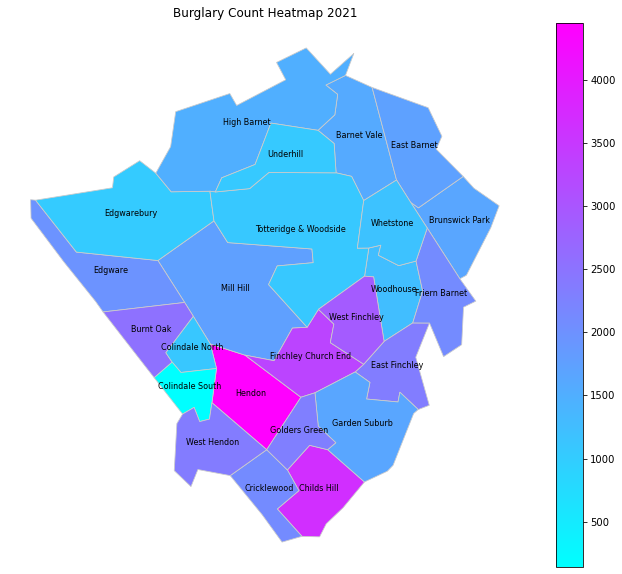

In [8]:
merged_data = ward_shapefile.merge(ward_counts, how='inner', left_on='WD22NM', right_on='WD22NM')
merged_data = merged_data[merged_data['LAD22NM'] == 'Barnet']

fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='Burglary Count', cmap='cool', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
merged_data.apply(lambda x: ax.annotate(text=x['WD22NM'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
ax.set_title('Burglary Count Heatmap 2021')
ax.set_axis_off()
plt.savefig('burglary_heatmap_2021.png', dpi=300)
plt.show()